In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz


    1.  fLength:  continuous  # major axis of ellipse [mm]

    2.  fWidth:   continuous  # minor axis of ellipse [mm] 

    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]

    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]

    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]

    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]

    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 

    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]

    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]

   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]

   11.  class:    g,h         # gamma (signal), hadron (background)



   g = gamma (signal):     12332

   h = hadron (background): 6688


In [121]:
# Define the column names for the dataset
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", 
        "fM3Trans", "fAlpha", "fDist", "class"]

# Load the dataset from the CSV file using the defined column names
# The 'names' parameter assigns the specified column names to the DataFrame
df = pd.read_csv("./file/magic04.data", names=cols)

# Display the first 5 rows of the DataFrame to verify data loading
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [122]:
# Print the unique value in the column
df["class"].unique()

array(['g', 'h'], dtype=object)

In [123]:
# Convert the 'class' column where 'g' becomes 1 and 'h' becomes 0
# The expression (df["class"] == "g") creates a boolean mask (True for 'g', False for 'h')
# .astype(int) converts True to 1 and False to 0
df["class"] = (df["class"] == "g").astype(int)

# Display the first 5 rows of the DataFrame to verify the conversion
df.head(n=5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


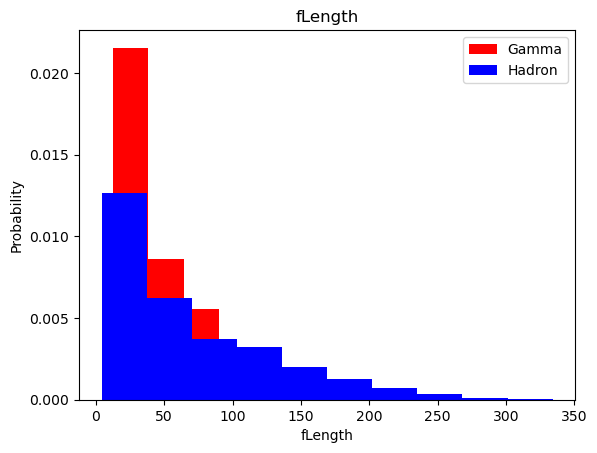

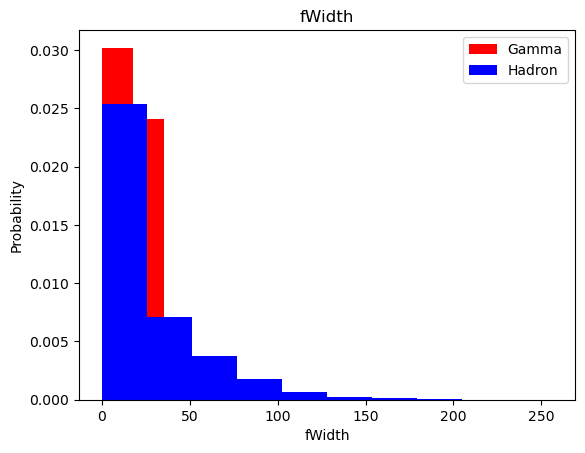

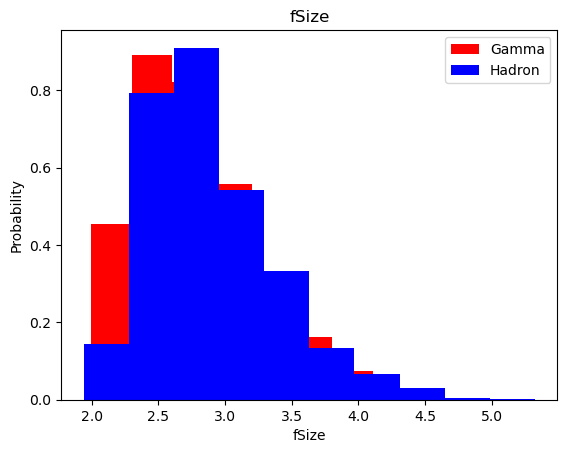

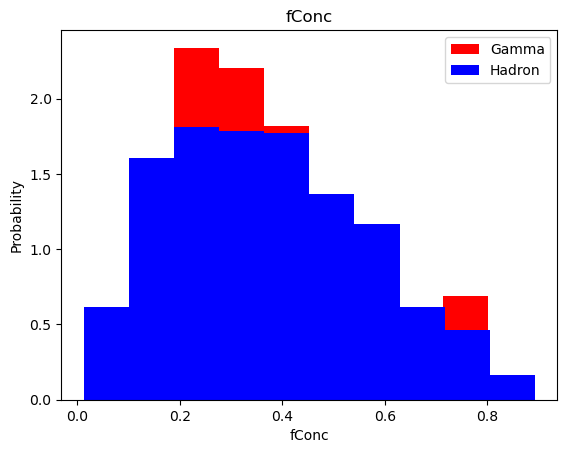

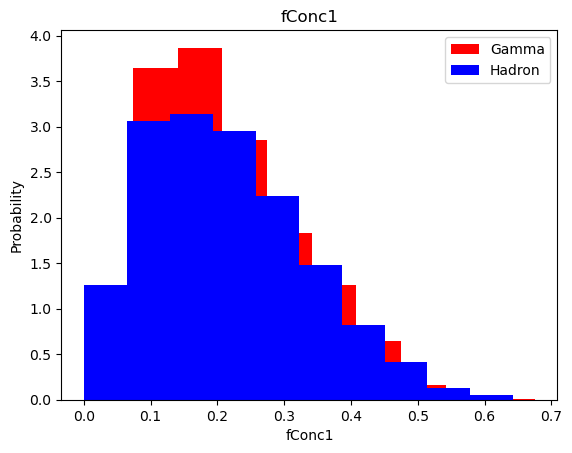

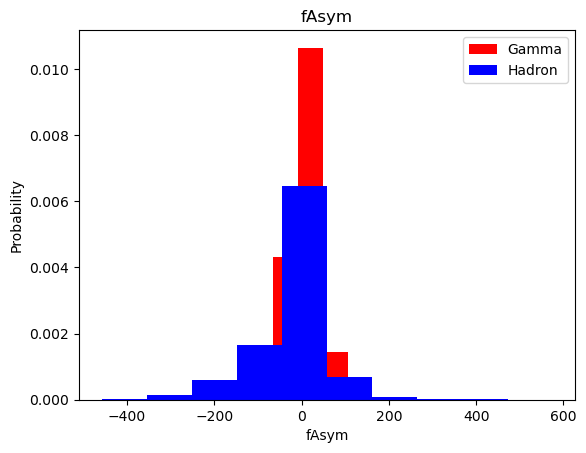

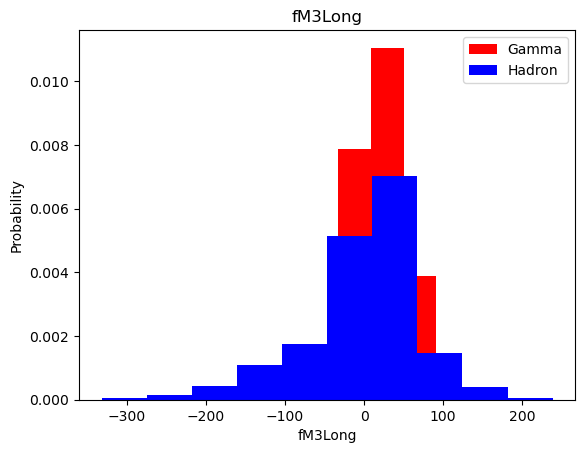

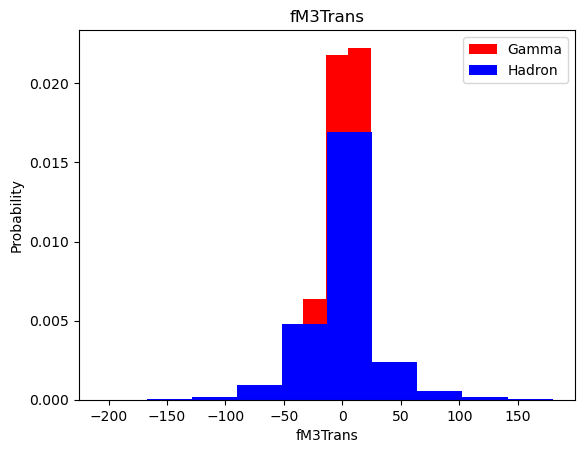

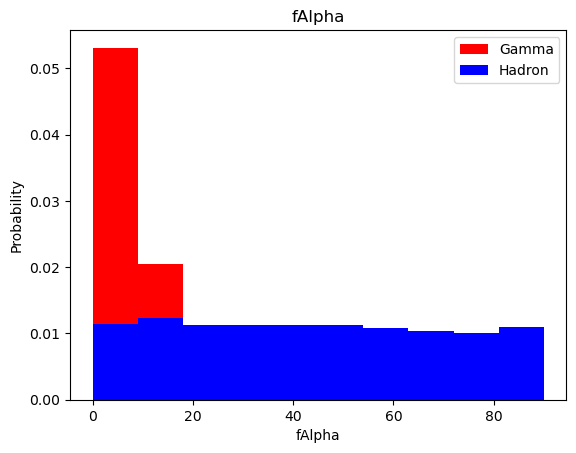

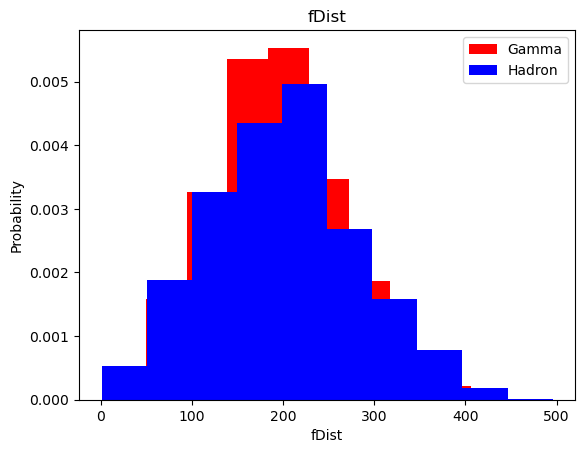

In [124]:
# Loop through each column in the DataFrame except the last one ('class')
for label in df.columns[:-1]:
    
    # Plot histogram for 'Gamma' class (where class is 1), using red color
    plt.hist(df[df["class"] == 1][label], color="red", label="Gamma", density=True)
    # Plot histogram for 'Hadron' class (where class is 0), using blue color
    plt.hist(df[df["class"] == 0][label], color="blue", label="Hadron", density=True)
    
    # Set the title of the plot as the column label being visualized
    plt.title(label)
    
    # Label for the y-axis indicating that it's showing probability
    plt.ylabel("Probability")
    # Label for the x-axis showing the current column being visualized
    plt.xlabel(label)
    
    # Display the legend to differentiate between 'Gamma' and 'Hadron'
    plt.legend()
    # Display the plot
    plt.show()


# Train, Validation, Test Datasets

In [125]:
## Shuffle the DataFrame using sample() method, frac=1 keeps all rows, and random_state ensures reproducibility
df_shuffled = df.sample(frac=1, random_state=42)

# Split the shuffled DataFrame into 3 parts:
# 60% for training, 20% for validation, and 20% for testing
train, valid, test = np.split(df_shuffled,
                              [int(0.6 * len(df)),  # First 60% for training
                               int(0.8 * len(df))]) # Next 20% for validation, rest for testing

/nix/store/gdckiap2g28wl5b5i8rhm98ijxkln6v7-python3.11-numpy-1.26.4/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [126]:
# Now you have train, valid, and test sets from the original DataFrame
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18749,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,0
7051,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
10901,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
15858,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,0
17968,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,0
...,...,...,...,...,...,...,...,...,...,...,...
87,34.8890,19.6402,2.8429,0.3747,0.2534,29.9825,29.1531,12.4846,8.3760,227.3360,1
7630,20.3329,17.3059,2.6707,0.4098,0.2231,11.3876,-9.3600,12.8626,89.6161,164.0240,1
4163,56.6139,26.1253,3.3259,0.1667,0.0862,0.5887,48.7686,-20.3598,9.8420,203.8090,1
3382,59.4502,18.2507,2.6493,0.3991,0.2119,22.6093,62.4000,9.1050,0.1321,177.6130,1


In [127]:
# Function to scale the dataset and optionally oversample it
def scale_dataset(dataframe, oversample=False):
    # Separate the feature columns (X) and the target column (Y)
    X = dataframe[dataframe.columns[:-1]].values  # All columns except the last one (features)
    Y = dataframe[dataframe.columns[-1]].values   # The last column (target/class)

    # Standardize the feature columns using StandardScaler (mean=0, variance=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # If oversampling is requested, apply RandomOverSampler to balance the classes
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)  # Resample X and Y to handle class imbalance

    # Combine the scaled features (X) and the target column (Y) into one dataset horizontally
    data = np.hstack((X,
                     np.reshape(Y, (-1, 1)))) # Reshape the target variable Y into a column vector

    # Return the final dataset (data), along with the scaled features (X) and target (Y) separately
    return data, X, Y

In [128]:
# Scale and optionally oversample the training, validation, and test datasets

train, x_train, y_train = scale_dataset(train, oversample=True)
# 'train' is the scaled training dataset with balanced classes
# 'x_train' is the scaled feature data for training
# 'y_train' is the target (class) labels for training

valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K-Neighbours

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [130]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [131]:
y_pred = knn_model.predict(x_test)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [137]:
y_pred = nb_model.predict(x_test)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.69      3804



# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRjegression

In [142]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [144]:
y_pred =  lr_model.predict(x_test)

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.82      2473

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine

In [160]:
from sklearn.svm import SVC

In [166]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [167]:
y_pred = svm_model.predict(x_test)

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1331
           1       0.88      0.90      0.89      2473

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

